In [1]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import statistics

def collect_and_analyze_ttps(primary_folder, secondary_folder):
    """
    Collect and analyze TTPs from two folders. 
    
    Performs file-wise TTP counting and statistical analysis on the number of unique TTPs per file.

    Parameters
    ----------
    primary_folder : str
        The path of the first folder.
    secondary_folder : str
        The path of the second folder.

    Returns
    -------
    dict
        A dictionary containing:
        - cumulative_unique_ttps: Number of unique TTPs across all files.
        - average_ttps: Average number of unique TTPs per file.
        - median_ttps: Median number of unique TTPs per file.
        - mode_ttps: Mode of unique TTP counts per file.
        - file_ttp_counts: List of unique TTP counts per file.
        - file_paths: List of file paths corresponding to the TTP counts.
    """
    # Regex to capture full TTP IDs (e.g., T1003, T1018, T1037)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Set to store cumulative unique TTPs across all files
    cumulative_unique_ttps = set()

    # Lists to store the count of TTPs and file paths
    file_ttp_counts = []
    file_paths = []

    # List of folder paths to iterate over
    folder_paths = [primary_folder, secondary_folder]

    # Loop through both folders
    for folder_path in folder_paths:
        # Loop through files in the specified folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            
            # Skip if it's not a file
            if not os.path.isfile(file_path):
                continue

            # Set to store unique TTPs in the current file
            unique_ttps_in_file = set()

            # Open the file and check each line for TTP patterns
            with open(file_path, 'r') as file:
                for line in file:
                    # Find all TTP IDs in the line and add them to the file's set
                    matches = ttp_pattern.findall(line)
                    unique_ttps_in_file.update(matches)

            # Add the unique TTPs from the current file to the cumulative set
            cumulative_unique_ttps.update(unique_ttps_in_file)

            # Store the count of TTPs in the current file and its path
            file_ttp_counts.append(len(unique_ttps_in_file))
            file_paths.append(file_path)

    # Calculate the statistics
    num_cumulative_unique_ttps = len(cumulative_unique_ttps)
    average_ttps = statistics.mean(file_ttp_counts) if file_ttp_counts else 0
    median_ttps = statistics.median(file_ttp_counts) if file_ttp_counts else 0
    mode_ttps = statistics.mode(file_ttp_counts) if file_ttp_counts else None

    # Filter the results to get files with exactly 1 unique TTP
    files_with_one_ttp = {file_paths[i]: count for i, count in enumerate(file_ttp_counts) if count == 1}
    
    print(f"Number of files with exactly 1 unique TTP: {len(files_with_one_ttp)}")

    return {
        "cumulative_unique_ttps": num_cumulative_unique_ttps,
        "average_ttps": average_ttps,
        "median_ttps": median_ttps,
        "mode_ttps": mode_ttps,
        "file_ttp_counts": file_ttp_counts,
        "file_paths": file_paths,
        "files_with_one_ttp": files_with_one_ttp
    }


In [2]:
# Define the folder paths
primary_folder = r"C:\Users\ricewater\Documents\CTIDownloads\malpedia_20220718\malpedia_20220718\iocs"
secondary_folder = r"C:\Users\ricewater\Documents\CTIDownloads\20241204_malpedia_downloads\iocs"

# Call the function and collect the results
ttp_analysis = collect_and_analyze_ttps(primary_folder, secondary_folder)

# Print analysis results
print(f"Cumulative unique TTPs: {ttp_analysis['cumulative_unique_ttps']}")
print(f"Average TTPs per file: {ttp_analysis['average_ttps']}")
print(f"Median TTPs per file: {ttp_analysis['median_ttps']}")
print(f"Mode TTPs per file: {ttp_analysis['mode_ttps']}")


Number of files with exactly 1 unique TTP: 174
Cumulative unique TTPs: 876
Average TTPs per file: 14.831917475728156
Median TTPs per file: 11.0
Mode TTPs per file: 1


In [60]:
def plot_file_count_by_ttp_buckets(file_ttp_counts, average, median, mode):
    # Count the frequency of TTP counts
    ttp_count_distribution = Counter(file_ttp_counts)

    # Prepare data for the bar chart
    x_values = sorted(ttp_count_distribution.keys())  # Unique TTP counts (sorted)
    print(x_values)
    y_values = [ttp_count_distribution[ttp] for ttp in x_values]  # Frequency of each TTP count

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='lightgreen', label='File Counts')

    # Highlight average, median, and mode
    plt.axvline(x=average, color='blue', linestyle='--', linewidth=1.5, label=f'Average ({average:.2f})')
    plt.axvline(x=median, color='orange', linestyle='--', linewidth=1.5, label=f'Median ({median:.2f})')
    plt.axvline(x=mode, color='red', linestyle='--', linewidth=1.5, label=f'Mode ({mode})')

    # Add labels and title
    plt.xlabel('Number of Unique TTPs', fontsize=12)
    plt.ylabel('Number of Files', fontsize=12)
    #plt.title('Distribution of Files by Unique TTP Count', fontsize=14)
    #plt.xticks(x_values, fontsize=10)  # Show exact TTP counts on the x-axis

    #Customize x-axis ticks for MITRE
    #plt.xticks([1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['1', '5', '10', '15', '20', '30', '40', '50', '60', '70', '80', '90', '100'], fontsize=10)
    
    
    #Customize x-axis ticks for Malpedia
    plt.xticks([1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200], labels=['1', '5', '10', '15', '20', '30', '40', '50', '60', '70', '80', '90','100', '150', '200'], fontsize=10)
    plt.legend()
    plt.tight_layout()  # Adjust layout
    
    # Save the plot as a PDF
    output_pdf = "Malpediacount_plot.pdf"
    #output_pdf = "MITREcount_plot.pdf"
    plt.savefig(output_pdf, format='pdf')
    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 71, 72, 73, 74, 75, 77, 79, 80, 81, 88, 91, 97, 98, 103, 106, 109, 146, 211]


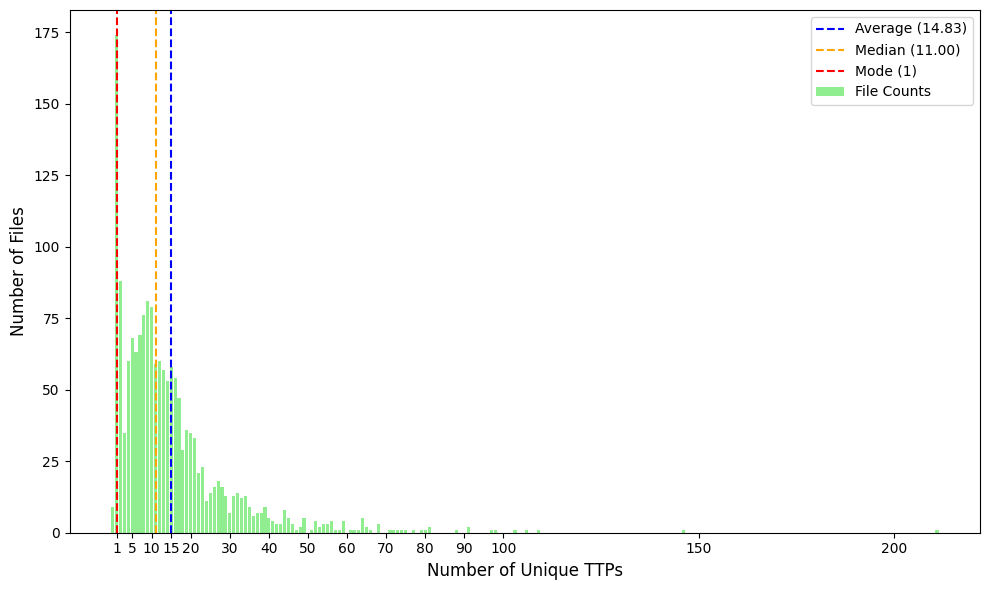

In [61]:
# Display the TTP bucket distribution chart
plot_file_count_by_ttp_buckets(
    ttp_analysis['file_ttp_counts'],  # This is the correct list of TTP counts for each file
    ttp_analysis['average_ttps'], 
    ttp_analysis['median_ttps'], 
    ttp_analysis['mode_ttps']
)

In [35]:
import json
import re
from urllib.parse import urlparse

def extract_metadata_from_files(metadata_file_paths, bib_file_path):
    # Dictionary to store the results from both files
    metadata_dict = {}

    # Regex pattern to capture URL and date from the .bib file
    url_pattern = re.compile(r"url\s*=\s*{(.+?)}", re.IGNORECASE)
    date_pattern = re.compile(r"date\s*=\s*{(.+?)}", re.IGNORECASE)

    # Dictionary to map URLs to dates from the .bib file
    bib_url_date_map = {}

    # Read the .bib file and extract URL and date
    with open(bib_file_path, 'r', encoding='utf-8') as bib_file:
        current_url = None
        current_date = None

        for line in bib_file:
            url_match = url_pattern.search(line)
            date_match = date_pattern.search(line)

            if url_match:
                current_url = url_match.group(1).strip()

            if date_match:
                current_date = date_match.group(1).strip()

            if current_url and current_date:
                bib_url_date_map[current_url] = current_date
                current_url, current_date = None, None

    # Loop through the metadata files and extract metadata
    for metadata_file_path in metadata_file_paths:
        with open(metadata_file_path, 'r') as meta_file:
            for line in meta_file:
                try:
                    entry = json.loads(line)
                    download_sha256 = entry.get("download_sha256")
                    url = entry.get("url", "")
                    fqdn = urlparse(url).netloc

                    # Try to match the URL from the metadata with the one from the .bib file
                    matched_date = bib_url_date_map.get(url, None)

                    # Add the extracted values to the dictionary
                    if download_sha256:
                        metadata_dict[download_sha256] = {
                            "fqdn": fqdn,
                            "date": matched_date if matched_date else "No Date"
                        }
                        
                except json.JSONDecodeError:
                    print(f"Skipping invalid JSON entry in file: {metadata_file_path}")
    
    return metadata_dict

# Specify the metadata file paths
metadata_file_paths = [
    r"C:\Users\ricewater\Documents\CTIDownloads\malpedia_20220718\malpedia_20220718\malpedia-db_2022-07-18_downloader.jsonl",
    r"C:\Users\ricewater\Documents\CTIDownloads\20241204_malpedia_downloads\20241204_downloads.jsonl"
]

# Specify the .bib file path
bib_file_path = r"C:\Users\ricewater\Documents\CTIDownloads\20241204_malpedia_downloads\malpedia-db_2024-11-12.bib"

# Extract metadata from both files and match with the .bib file
combined_metadata = extract_metadata_from_files(metadata_file_paths, bib_file_path)

# Print the resulting dictionary
#for sha256, data in combined_metadata.items():
#    print(f"SHA256: {sha256}, FQDN: {data['fqdn']}, Date: {data['date']}")


In [51]:
from collections import defaultdict
from datetime import datetime
import logging

# Set up logging to a file
logging.basicConfig(filename='skipped_dates.log', level=logging.INFO)

def count_reports_per_month(metadata_dict):
    # Dictionary to store the count of reports per month
    monthly_report_count = defaultdict(int)

    # Loop through the metadata dictionary
    for sha256, data in metadata_dict.items():
        # Extract the date from metadata
        date_str = data.get("date", None)

        if date_str:
            try:
                # If the date is just a year (e.g., "2020"), skip it
                if len(date_str) == 4:  # Year only (e.g., "2020")
                    continue
                
                # If the date is a month (e.g., "2020-12"), process it
                elif len(date_str) == 7:  # Year and month (e.g., "2020-12")
                    # Parse the month-year
                    date_obj = datetime.strptime(date_str, "%Y-%m")
                    month_year = date_obj.strftime('%Y-%m')
                    monthly_report_count[month_year] += 1
                
                # If the date is a full date (e.g., "2020-12-31"), process it
                elif len(date_str) == 10:  # Full date (e.g., "2020-12-31")
                    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
                    month_year = date_obj.strftime('%Y-%m')
                    monthly_report_count[month_year] += 1
                
                # Skip invalid date formats
                else:
                    logging.info(f"Skipping file with invalid date format: {date_str}")
            
            except ValueError:
                logging.info(f"Skipping file with invalid date format: {date_str}")
    
    return monthly_report_count

# Get the count of reports per month
monthly_report_count = count_reports_per_month(combined_metadata)

# Output the results
#print("Monthly report counts:")
#for month, count in sorted(monthly_report_count.items()):
#    print(f"{month}: {count} reports")


In [45]:
import os
from collections import defaultdict
from datetime import datetime

def count_reports_per_month(folder_paths, metadata_dict):
    # Dictionary to store the count of reports per month
    monthly_report_count = defaultdict(int)

    # Loop through each folder path
    for folder_path in folder_paths:
        # Loop through the files in the current folder
        for filename in os.listdir(folder_path):
            # Extract the download_sha256 from the file name (before the first '.')
            if filename.endswith(".download.iocs"):
                download_sha256 = filename.split(".")[0]

                # Check if the download_sha256 exists in the metadata dictionary
                metadata = metadata_dict.get(download_sha256)
                
                if metadata:
                    date = metadata.get('date')

                    # If date exists, try to process it
                    if date:
                        try:
                            # Handle different date formats
                            if len(date) == 7:  # Year-Month format (e.g., "2022-08")
                                date_obj = datetime.strptime(date, '%Y-%m')
                                month_year = date_obj.strftime('%Y-%m')
                                monthly_report_count[month_year] += 1
                            elif len(date) == 10:  # Full date format (e.g., "2022-08-10")
                                date_obj = datetime.strptime(date, '%Y-%m-%d')
                                month_year = date_obj.strftime('%Y-%m')
                                monthly_report_count[month_year] += 1
                        except ValueError:
                            continue  # Skip files with invalid date format
                        
    return monthly_report_count

# Example usage:
folder_paths = [
    r"C:\Users\ricewater\Documents\CTIDownloads\malpedia_20220718\malpedia_20220718\iocs",
    r"C:\Users\ricewater\Documents\CTIDownloads\20241204_malpedia_downloads\iocs"
]

# Assuming metadata_dict is already populated with the relevant data
monthly_report_count_ttp = count_reports_per_month(folder_paths, combined_metadata)

# Print the resulting counts
#for month, count in sorted(monthly_report_count_ttp.items()):
#    print(f"{month}: {count}")


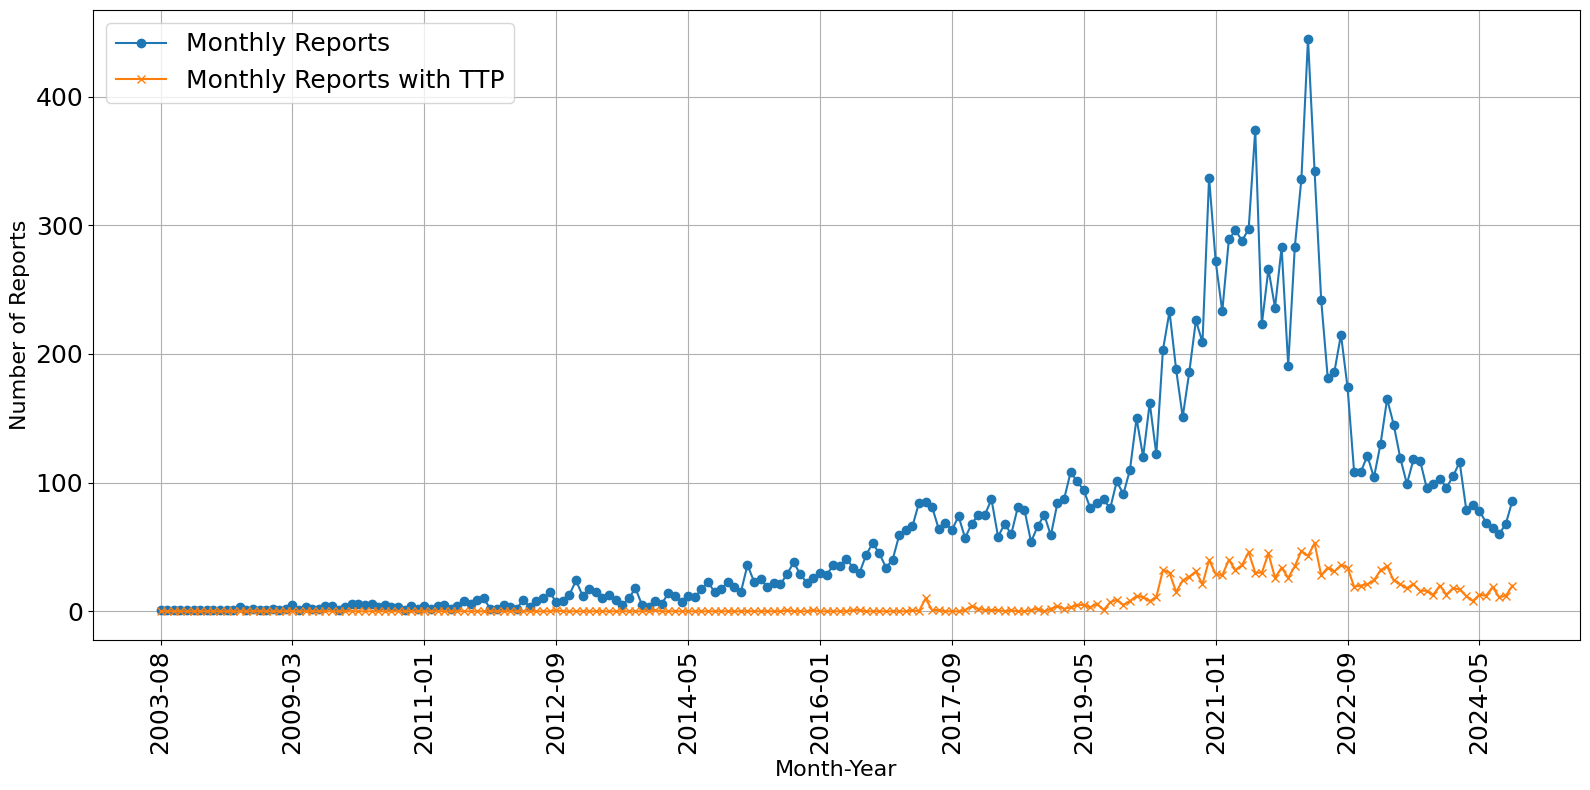

In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Combine both datasets
all_months = sorted(set(monthly_report_count.keys()).union(monthly_report_count_ttp.keys()))
report_counts = [monthly_report_count.get(month, 0) for month in all_months]
ttp_counts = [monthly_report_count_ttp.get(month, 0) for month in all_months]

# Exclude the first and last points
all_months = all_months[1:-1]
report_counts = report_counts[1:-1]
ttp_counts = ttp_counts[1:-1]


# Plotting
plt.figure(figsize=(16, 8))
plt.plot(all_months, report_counts, label='Monthly Reports', marker='o')
plt.plot(all_months, ttp_counts, label='Monthly Reports with TTP', marker='x')

# Customize the x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))  # Show at most 12 ticks
plt.xticks(rotation=90, fontsize=18)  # Rotate x-axis labels
plt.yticks(fontsize=18)
plt.xlabel('Month-Year', fontsize=16)
plt.ylabel('Number of Reports', fontsize=16)
#plt.title('Monthly Counts of Reports with TTPs vs Total Reports')
plt.grid(True)
plt.legend(fontsize=18)
plt.tight_layout()

plt.savefig("Malpedia_monthly_report_comparison.pdf", format="pdf")

plt.show()
